# crawl delicious food in tw

In [1]:
from bs4 import BeautifulSoup as bs
import urllib
import re     #导入正则
import pandas as pd
import requests
import jieba     #导入结巴分词
import jieba.analyse

In [2]:
headers = {'Host':'www.go2tw.cn',
        'Referer':'http://www.go2tw.cn/',
        'method':'GET',
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36',
        'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Accept-Encoding':'gzip, deflate',
        'Accept-Language':'zh-CN,zh;q=0.9'}

In [3]:
r = requests.get('http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052')
print(r.encoding)

utf-8


In [4]:
headers = {'Host':'www.go2tw.cn',
        'Referer':'http://www.go2tw.cn/',
        'method':'GET',
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36',
        'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Accept-Encoding':'gzip, deflate',
        'Accept-Language':'zh-CN,zh;q=0.9'}

have_next_page = True
page_index = 1
new_request_url = 'http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052'
while have_next_page:
    this_page = requests.get(new_request_url).text
    page_model = bs(this_page,'lxml')
    sneck_articles = page_model.find_all(name='strong',class_='title')
    for i,article in enumerate(sneck_articles):
        print(f'第{i+1}篇文章')
        article_url = article.a['href']
        article_content = requests.get(article_url).text
        article_soup = bs(article_content,'lxml')
        article_dom = article_soup.find(class_='detail')
        if article_dom == None:
            continue
        content = article_dom.text
        fout = open('delicious in TW.txt','a+',encoding='utf-8')
        fout.write(content)
        fout.write("***********************（^_^）********************")
        fout.close()
    if page_model.find(text='下一页').find_parent().has_attr('href'):
        next_page_href = page_model.find(text='下一页').find_parent()['href']
        next_page_param = next_page_href[next_page_href.find('__hash__'):]
        new_request_url = new_request_url[0:new_request_url.find('__hash__')] + next_page_param
        page_index += 1
        print(f"new request url:{new_request_url},next page is {page_index}")
    else:
        have_next_page = False
        print('all page crawled done')

第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章
new request url:http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052&p=2,next page is 2
第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章
new request url:http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052&p=3,next page is 3
第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章
new request url:http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052&p=4,next page is 4
第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章
new request url:http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052&p=5,next page is 5
第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章
new request url:http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052&p=6,next page is 6
第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章

#### 从文件中读取段落做词频统计（在做词频统计之前需要用空格把分词隔开）

In [5]:
fread = open('delicious in TW.txt','r',encoding='utf-8')
all_articles_origin = fread.read()
all_articles_without_space = all_articles_origin.replace(' ','')
all_articles_cn_left_list = re.findall(r'[\u4e00-\u9fff]+',all_articles_without_space)
all_articles_cn_left = " ".join(all_articles_cn_left_list)
all_word_list = list(jieba.cut(all_articles_cn_left,cut_all=False))
delicious_words = " ".join(all_word_list)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 1.859 seconds.
Prefix dict has been built succesfully.


In [6]:
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

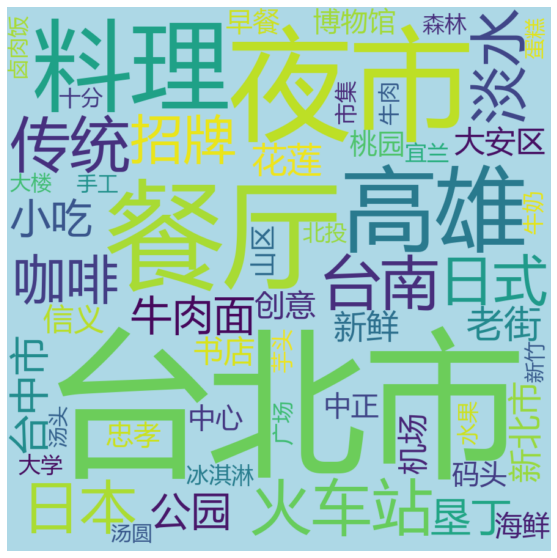

In [7]:
wc = WordCloud(width=890,
              height=890,
              background_color='lightblue',
              max_words=55,
              colormap='viridis',
              collocations=False,
              random_state=5,
              font_path='./fonts/cn/msyh.ttc',
              stopwords=('我们','分钟','美食','如果','图片','来源','网络','除了','不同','没有','时间','小时','起来','以及','因为','可以',
                         '资讯','非常','位于','一个','自由','台湾','地址','还有','成为','许多','大家','开放','交通','建筑','周一','游客',
                         '文化','下车','步行','到达','好玩','一段','园区','捷运','人们','之一','车站','来自','人均','特别','朋友','主题',
                         '历史','景点','客运','特色','周日','游玩','地方','世界','提供','出口','搭乘','推荐','附近','就是','二段','活动',
                         '美味','味道','消费','体验','地点','很多','电话','生活','人气','艺术','店家','口感','使用','看到','自己','店铺',
                         '台北','搭配','来到','商圈','还是','这里','所在','高雄市','假日','周六','一定','即可','所以','更是','各种',
                         '喜欢','设计','台币','公车','营业时间','选择','打卡','拥有','加上','方式','口味','前往','观光','高铁','不仅','以上',
                         '公休','整理','享受','一起','开始','缘由','相当','免费','食材','一般','制作','好吃','适合','参观','店内','温泉',
                         '丰富','一家','理由','服务','错过','现在','风格','网路','欣赏','最大','空间','品尝','老板','全台','火车','而且',
                         '需要','市场','介绍','周五','排队','风味','感受','网友','旅游','这家','拍摄','但是','不能','结合','已经','虽然',
                         '行程','知名','用餐','不少','绝对','著名','台南市','其中','乐园','四段','这个','攻略','充满','民众','平日','独特',
                         '餐点','吸引','美丽','一样','门票','不会','每天','明星','价格','三段','其他','同时','主要','美景','一种','票价',
                         '电影','为主','路线','這裡','自然','最后','周二','故事'))
delicious_wordcloud = wc.generate(delicious_words)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(delicious_wordcloud,interpolation='bilinear')

In [8]:
# 第一个参数：待提取关键词的文本
# 第二个参数：返回关键词的数量，重要性从高到低排序
# 第三个参数：是否同时返回每个关键词的权重
# 第四个参数：词性过滤，为空表示不过滤，若提供则仅返回符合词性要求的关键词
delicious_keyword_sort = jieba.analyse.extract_tags(delicious_words,topK=25,withWeight=True,allowPOS=('a'))
delicious_keyword_sort

[('自由', 0.2794620533613487),
 ('忠孝', 0.22528252288467843),
 ('便当', 0.1548432494786152),
 ('丰富', 0.15124583599151173),
 ('不同', 0.1389082668295701),
 ('精致', 0.12381326880997594),
 ('浓郁', 0.1214757863825268),
 ('独特', 0.11273348750121966),
 ('充满', 0.10920609764582477),
 ('酥脆', 0.10806280075490045),
 ('著名', 0.10142536144101072),
 ('最大', 0.09549155771377162),
 ('浪漫', 0.09436098724814264),
 ('一般', 0.09107349007749618),
 ('复兴', 0.0886105745457099),
 ('简单', 0.07989119495433167),
 ('有名', 0.07585488366735944),
 ('不错', 0.07242846406627652),
 ('软嫩', 0.06799911508978342),
 ('最美', 0.06718079358143075),
 ('方便', 0.06340749986161016),
 ('不腻', 0.061460738638842695),
 ('幸福', 0.061065907104791074),
 ('特殊', 0.05916507394120543),
 ('重要', 0.05838155682820827)]

#### Draft——some practise

In [5]:
test_list = ['天使','任意门','成名在望','顽固','少年它的奇幻漂流','九号球']
for i,item in enumerate(test_list):
    print(f'第{i+1}首歌：{item}')
    

第1首歌：天使
第2首歌：任意门
第3首歌：成名在望
第4首歌：顽固
第5首歌：少年它的奇幻漂流
第6首歌：九号球


In [16]:
headers = {'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Accept-Encoding':'gzip, deflate',
        'Accept-Language':'zh-CN,zh;q=0.9',
        'Cache-Control':'max-age=0',
        'Connection':'keep-alive',
        'Cookie':'_ga=GA1.2.2125999785.1572837518; _gid=GA1.2.1443733835.1574079317; PHPSESSID=4a6f67950a04149387ef6763146c8842; crisp-client%2Fsession%2F4bb27c5c-6279-481c-a9ef-27be5c42a661=session_3704b804-e503-4175-9887-5b65fa06bc3f',
        'Host':'www.go2tw.cn',
        'Upgrade-Insecure-Requests': 1,
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'}
response = requests.get('http://www.go2tw.cn/article/show/3.html')
html_content = response.text
page_soup = bs(html_content,'lxml')
aim_node = page_soup.find(id='detail')
print(aim_node)

None


#### 结巴分词练习

In [84]:
import jieba
import re

In [23]:
sentences = "细数繁星闪烁，细数此生奔波，原来所有所得所获不如一夜的星空气中的温柔，回忆你的笑容，仿佛只要伸手就能触摸"
word1 = jieba.cut(sentences,cut_all=True)
word2 = jieba.cut(sentences,cut_all=False)
print(" /".join(word1))
print(' /'.join(word2))

细数 /繁星 /闪烁 / / /细数 /此生 /奔波 / / /原来 /所有 /有所 /所得 /所 /获 /不如 /如一 /一夜 /的 /星空 /空气 /中 /的 /温柔 / / /回忆 /你 /的 /笑容 / / /仿佛 /只要 /伸手 /就 /能 /触摸
细数 /繁星 /闪烁 /， /细数 /此生 /奔波 /， /原来 /所有 /所得 /所获 /不如 /一夜 /的 /星 /空气 /中 /的 /温柔 /， /回忆 /你 /的 /笑容 /， /仿佛 /只要 /伸手 /就 /能 /触摸


In [33]:
lyric1 = '而回忆越是甜就是越伤人了，越是在手心留下密密麻麻深深浅浅的刀割'
lyric2 = '泪未干，心未凉，是什么依然在滚烫，入阵去，只因恨铁不成钢'
lyric3 = '五花马，千金裘，呼儿将出换美酒，与尔同销万古愁'
lyric4 = '无止境标记沽清，每一季被人肆意兼并，哪一个转会窗可似水恬静。成名后过路曼城，成名后转阵敌营，谁人期盼每一个最后可转性'
print(" /".join(jieba.cut(lyric1,cut_all=False)))
print(" /".join(jieba.cut(lyric2,cut_all=False)))
print(" /".join(jieba.cut(lyric3,cut_all=False)))
print(" /".join(jieba.cut(lyric4,cut_all=False)))

而 /回忆 /越是 /甜 /就是 /越 /伤人 /了 /， /越是 /在 /手心 /留下 /密密麻麻 /深深浅浅 /的 /刀割
泪未 /干 /， /心未凉 /， /是 /什么 /依然 /在 /滚烫 /， /入阵 /去 /， /只 /因 /恨铁不成钢
五花马 /， /千金 /裘 /， /呼儿 /将 /出换 /美酒 /， /与尔同销 /万古愁
无止境 /标记 /沽清 /， /每 /一季 /被 /人 /肆意 /兼并 /， /哪 /一个 /转会 /窗可似 /水 /恬静 /。 /成名 /后 /过路 /曼城 /， /成名 /后 /转阵 /敌营 /， /谁 /人 /期盼 /每 /一个 /最后 /可 /转性


In [114]:
title_reader = open('trip_at_danshui.txt','r',encoding='utf-8')
titles = title_reader.read()
titles_without_url_list = re.findall(r'[\u4e00-\u9fff]+',titles)     #只留下中文的正则
titles_without_url = ''.join(titles_without_url_list)
#print(titles_without_url)
word_list = list(jieba.cut(titles_without_url,cut_all=False))
word_combined = ' '.join(word_list)
print(word_combined)

淡水 老字号 许义 鱼 酥 邂逅 淡水 海關 碼頭 美麗 夏夜 台北 淡水 一日 行 台北 北投 淡水 一日游 你 不 知道 的 淡水 淡水 古迹 一日游 台北 台北 淡水 两日游 非 流行 指南 文艺 淡水 一日游 幸福 边玩 边 拍 台北 淡水 一日游 旅拍 行程 攻略 寻找 金色 水岸 与 八里 左岸 的 浪漫 足迹 八里 淡水 一日游 阿给 鱼丸 周杰伦 套餐 没吃过 这些 一定 去 了 假 淡水 全台 骑 铁马 游 台湾 台北 阳明山 景观 餐厅 屋顶 上 台北 玩转 台北 捷运 松山 新店 线 全台 最美 十大 教堂 告白 求婚 见证 幸福 的 最佳 场所 天 台北 游 台北 日 自由 行之 行程 概述 台北 怀古 一日游 台北 一日游 亲子 游 亲子 游 推荐 地穷 到 吃 土 还 做 发财梦 试试 这座 台湾 求 财神庙 计程车 台湾 主要 县市 地区 计程车 收费 标准 参考 台北 宜兰 兰阳 三日 游行 程 推荐 台北 历史悠久 的 泷 乃 汤 红砖 堆垒 出 岁月 的 芬芳 台湾 老街 攻略 台铁 台北 车站 及 台北 转运站 介绍 有 恐龙 还有 羊 你 一定 没见 过 这么 不正经 的 河滨公园 台北 日 自由 行之 第二天 秘境 梯田 石槽 原来 新北市 有 这么 多 地方 值得 去 台北 河岸 音樂季 台北 夜市 微博 口碑 榜五迷 台湾 自由 行 打卡 地 名录 天 环岛 日 环岛游 行程 别人 家 的 大学生 吃 什么 台湾 淡江大学 家 隐藏 版 美食 全 台 推荐 观光 农场 牧场 汇总 国家 地理杂志 推荐 最佳 夏季 旅游 台湾 北海岸 上榜 樱花 红 陌上 全台 赏 樱 攻略 旅行 打卡 如何 显得 更酷 台湾 这 几个 地方 你 要 去 台北 春浪 音乐节 北部 带 着 婚纱 来 台湾 北 台湾 热 门外 拍 婚纱 景点 大 公开 我 可能 不会 爱 你 场景 大 公开 你 不 知道 的 台湾 中秋 赏月 景点 大 搜查 台北 铁枝路 特展 行李 寄存 指南 捷运 站 与 旅游 服务中心 篇 中部 日月潭 景区 及 美食 介绍 天 台北 游 自由 行之 小贴士 年度 色 草木 绿 势不可挡 但 还是 比不上 大自然 的 绿色 秘境 全台 台湾 那些 世界级 景点 盘踞 海上 的 巨龟 龟山岛 引发 高能 关注 的 台湾 

In [153]:
from wordcloud import WordCloud,ImageColorGenerator
import numpy as np
from PIL import Image

In [169]:
wc = WordCloud(width=890,
               height=890,
               background_color='lightblue',     #宽，高，背景色……
               max_words=55,     #显示出现频率最高的词的个数
               colormap='viridis',     #
               random_state=5,     #配色方案
               font_path='./fonts/cn/msyh.ttc',     #必须要设置
               collocations=False,
               stopwords=('台湾','淡水','台北','一日游','自由','档期','时间','玩转','绝美','追着','开放','随便','行之','全台','台湾人',
                          '行程','地点','公开','知道','地方','最美','必去','我们','热门','特色','最佳','日夜','一日',
                          '十大','推荐','攻略','介绍','幸福','一定','试试','三日','旅行','这么','主要',
                          '指南','那些','景点','容错过')     #可用于放置一些不想关心的词语
              )
my_wordcloud = wc.generate(word_combined)     #此处已经生成图像，但需要用pyplot.imshow才能显示

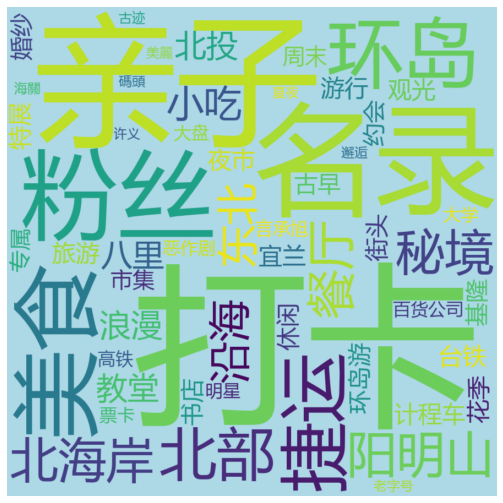

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,9))
plt.axis('off')
plt.imshow(my_wordcloud,interpolation='bilinear')     #推荐先设置图片尺寸，再设置坐标轴

In [108]:
import re

sample = '再翘课，再搞band，就滚出家里面，满腔梦想和热血，她说浪费时间'
for n in re.findall(r'[\u4e00-\u9fff]+',sample):
    print(n)
type(re.findall(r'[\u4e00-\u9fff]+',sample))

再翘课
再搞
就滚出家里面
满腔梦想和热血
她说浪费时间


list